In [17]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
import seaborn as sns
from sklearn.model_selection import ParameterGrid
import math

In [18]:
data = pd.read_csv("Carseats.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64
            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min  

C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

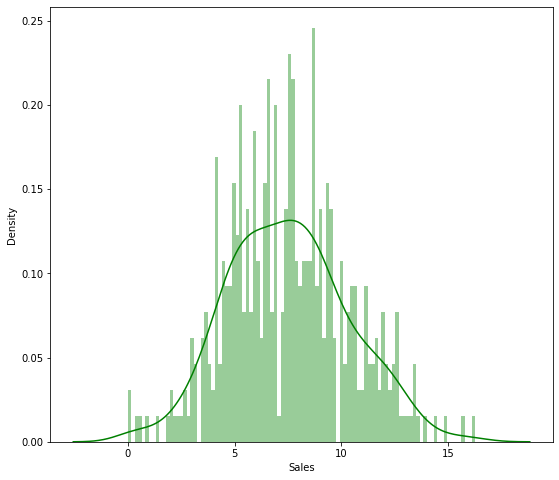

In [19]:
# Explore data
print(data["Sales"].describe())
print(data.describe())
plt.figure(figsize=(9,8))
sns.distplot(data['Sales'], color='g', bins=100, hist_kws={'alpha': 0.4})

In [20]:

data["ShelveLoc"] = data["ShelveLoc"].astype('category')
data.dtypes
data["ShelveLoc"] = data["ShelveLoc"].cat.codes
data.head()

data["Urban"] = data["Urban"].astype('category')
data.dtypes
data["Urban"] = data["Urban"].cat.codes
data.head()


data["US"] = data["US"].astype('category')
data.dtypes
data["US"] = data["US"].cat.codes
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [21]:
d_x = data.iloc[:,1:]
d_y = data.iloc[:,0]

array([[<AxesSubplot:title={'center':'CompPrice'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Advertising'}>],
       [<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'ShelveLoc'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Urban'}>],
       [<AxesSubplot:title={'center':'US'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

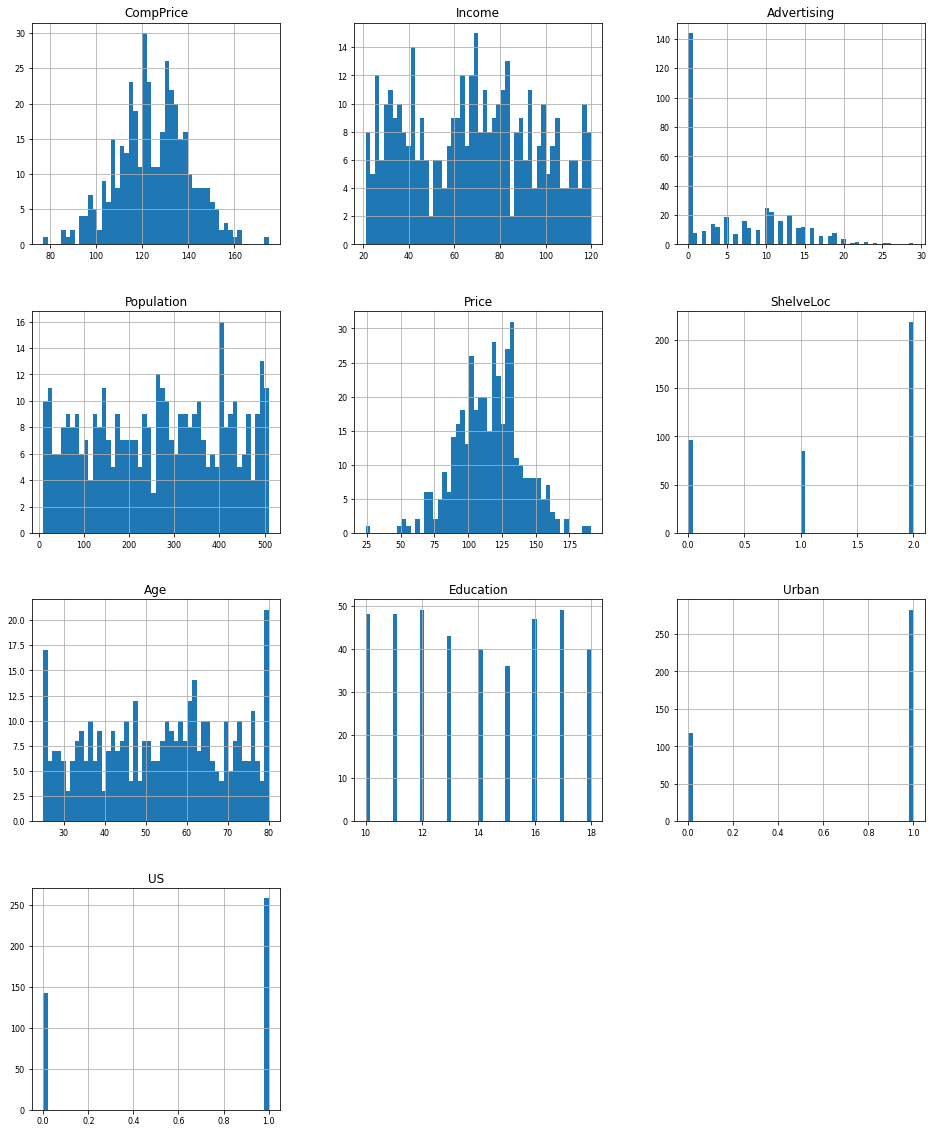

In [22]:
d_x.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [23]:
data_corr = data.corr()['Sales'][1:] # -1 because the latest row is SalePrice
golden_features_list = data_corr[abs(data_corr) > 0.1].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 6 strongly correlated values with SalePrice:
Advertising    0.269507
US             0.177093
ShelveLoc      0.157470
Income         0.151951
Age           -0.231815
Price         -0.444951
Name: Sales, dtype: float64


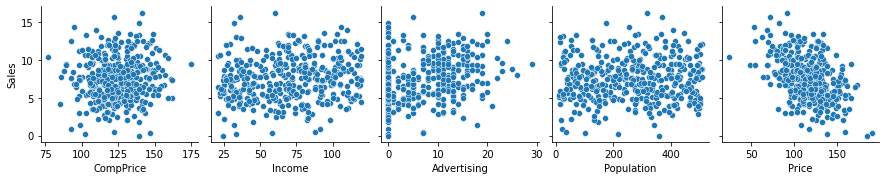

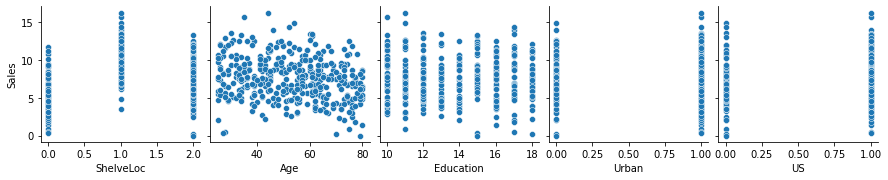

In [24]:
for i in range(1, len(data.columns), 5):
    sns.pairplot(data=data,
                x_vars=data.columns[i:i+5],
                y_vars=['Sales'])

In [29]:

x_train = d_x[:300]
y_train = d_y[:300]

x_test = d_x[300:]
y_test = d_y[300:]
feature = np.array(x_train.columns)
target = y_train.name
print(feature)
print(target)

1/(x_train.shape[0])

['CompPrice' 'Income' 'Advertising' 'Population' 'Price' 'ShelveLoc' 'Age'
 'Education' 'Urban' 'US']
Sales


0.0033333333333333335

['CompPrice' 'Income' 'Advertising' 'Population' 'Price' 'ShelveLoc' 'Age'
 'Education' 'Urban' 'US']
Sales


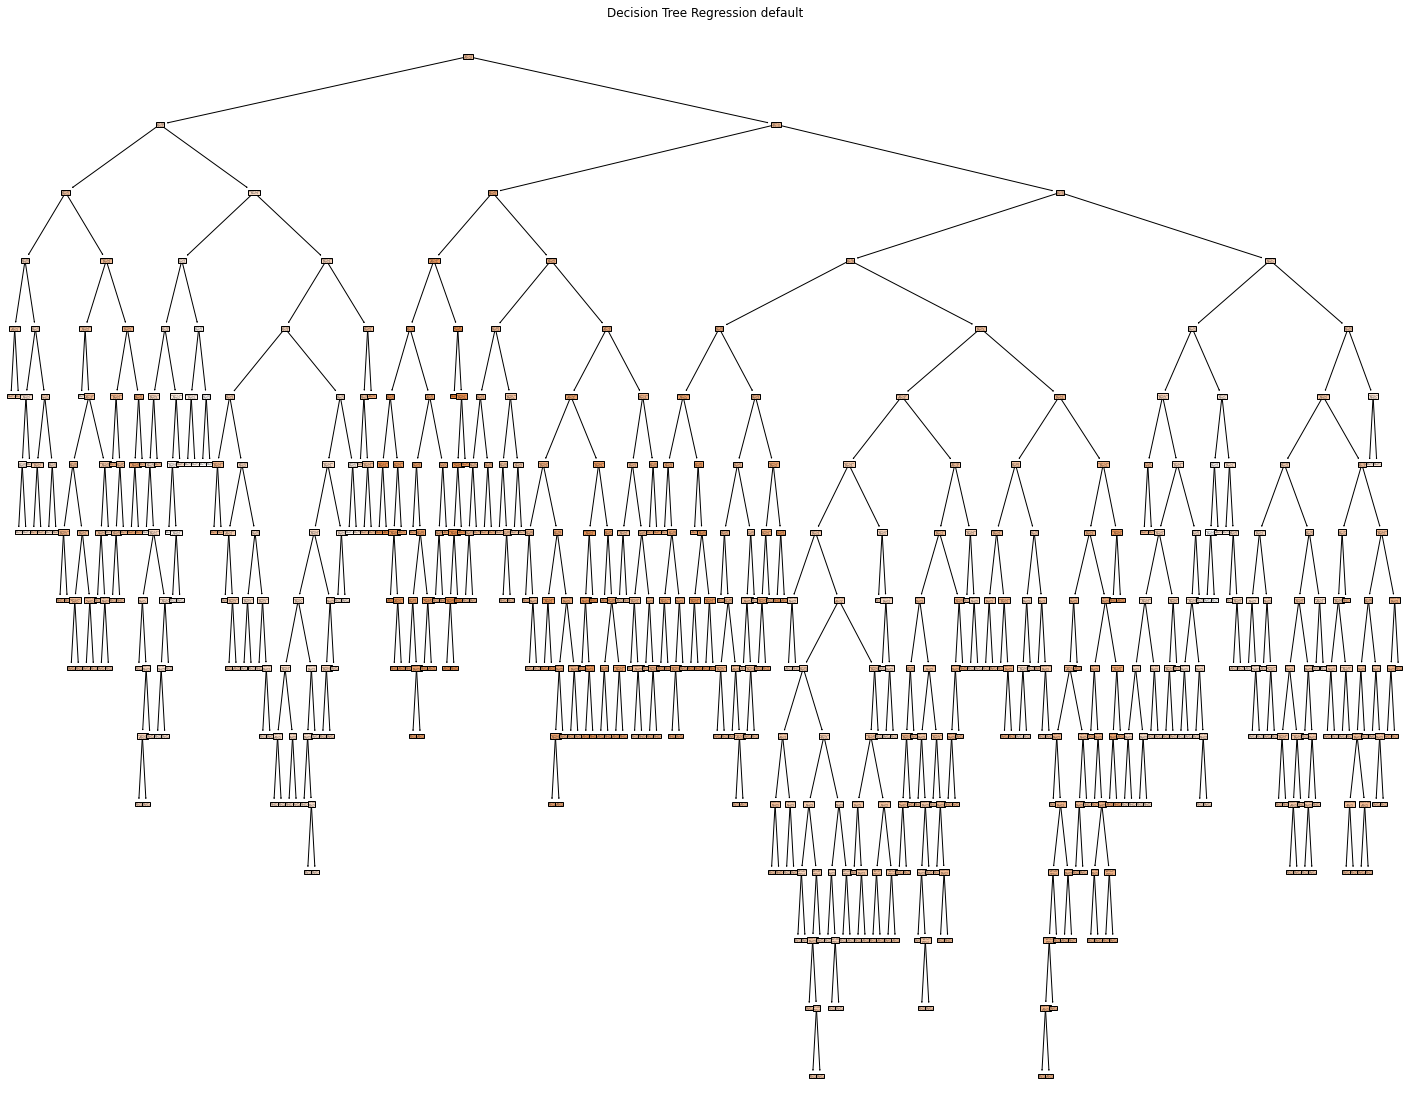

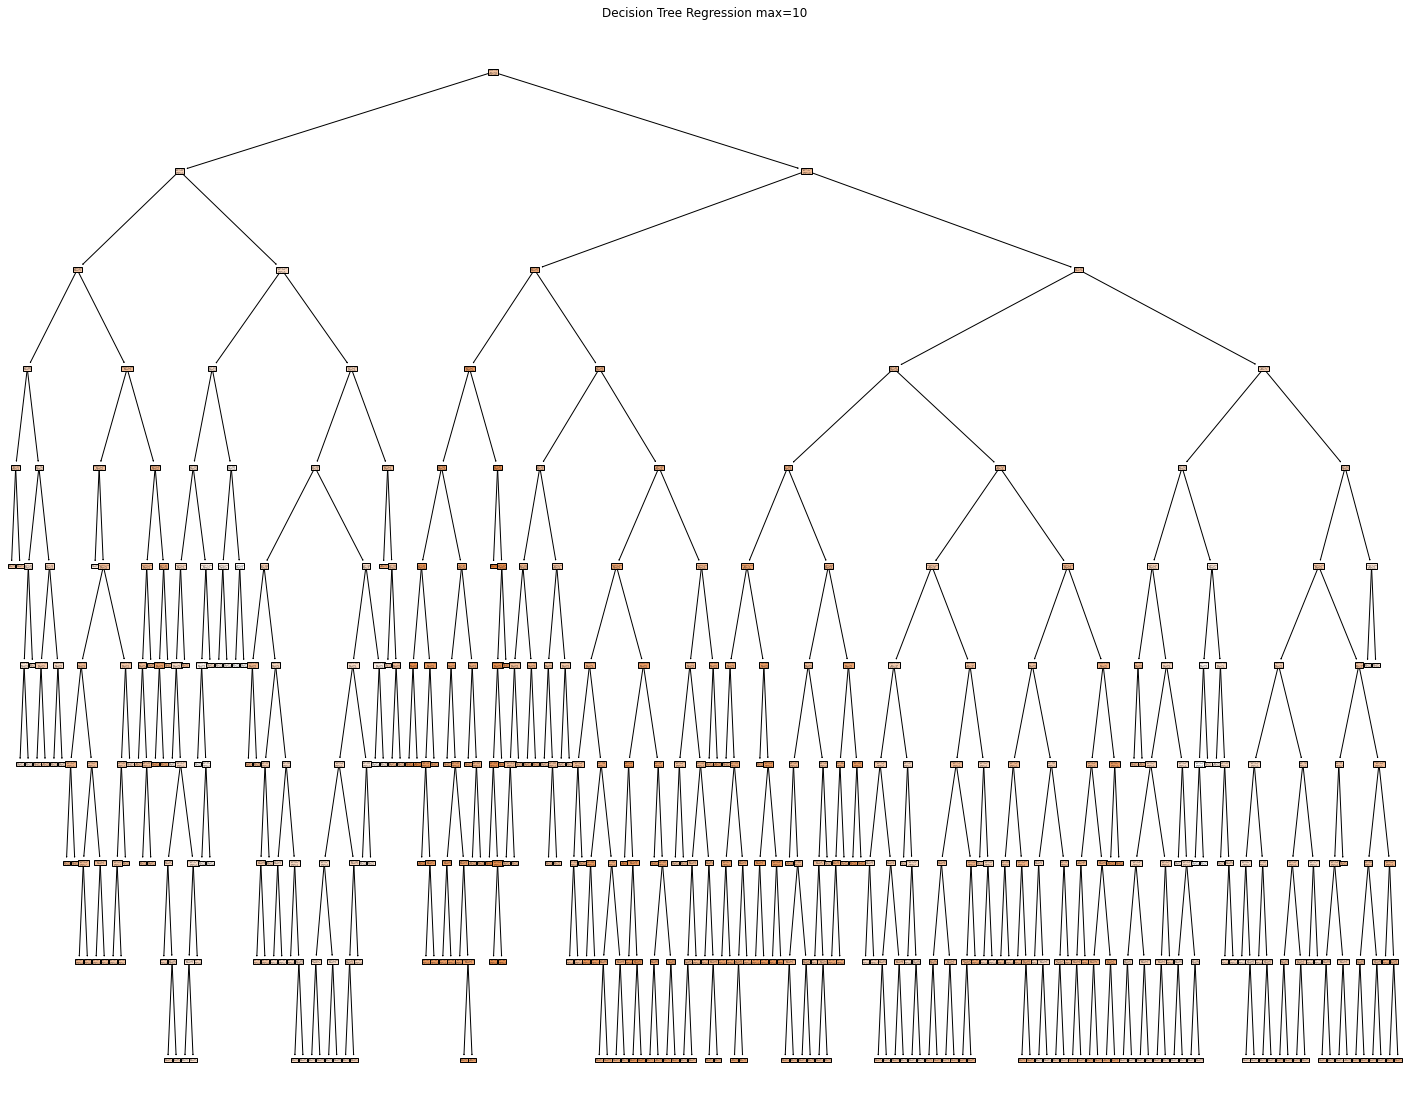

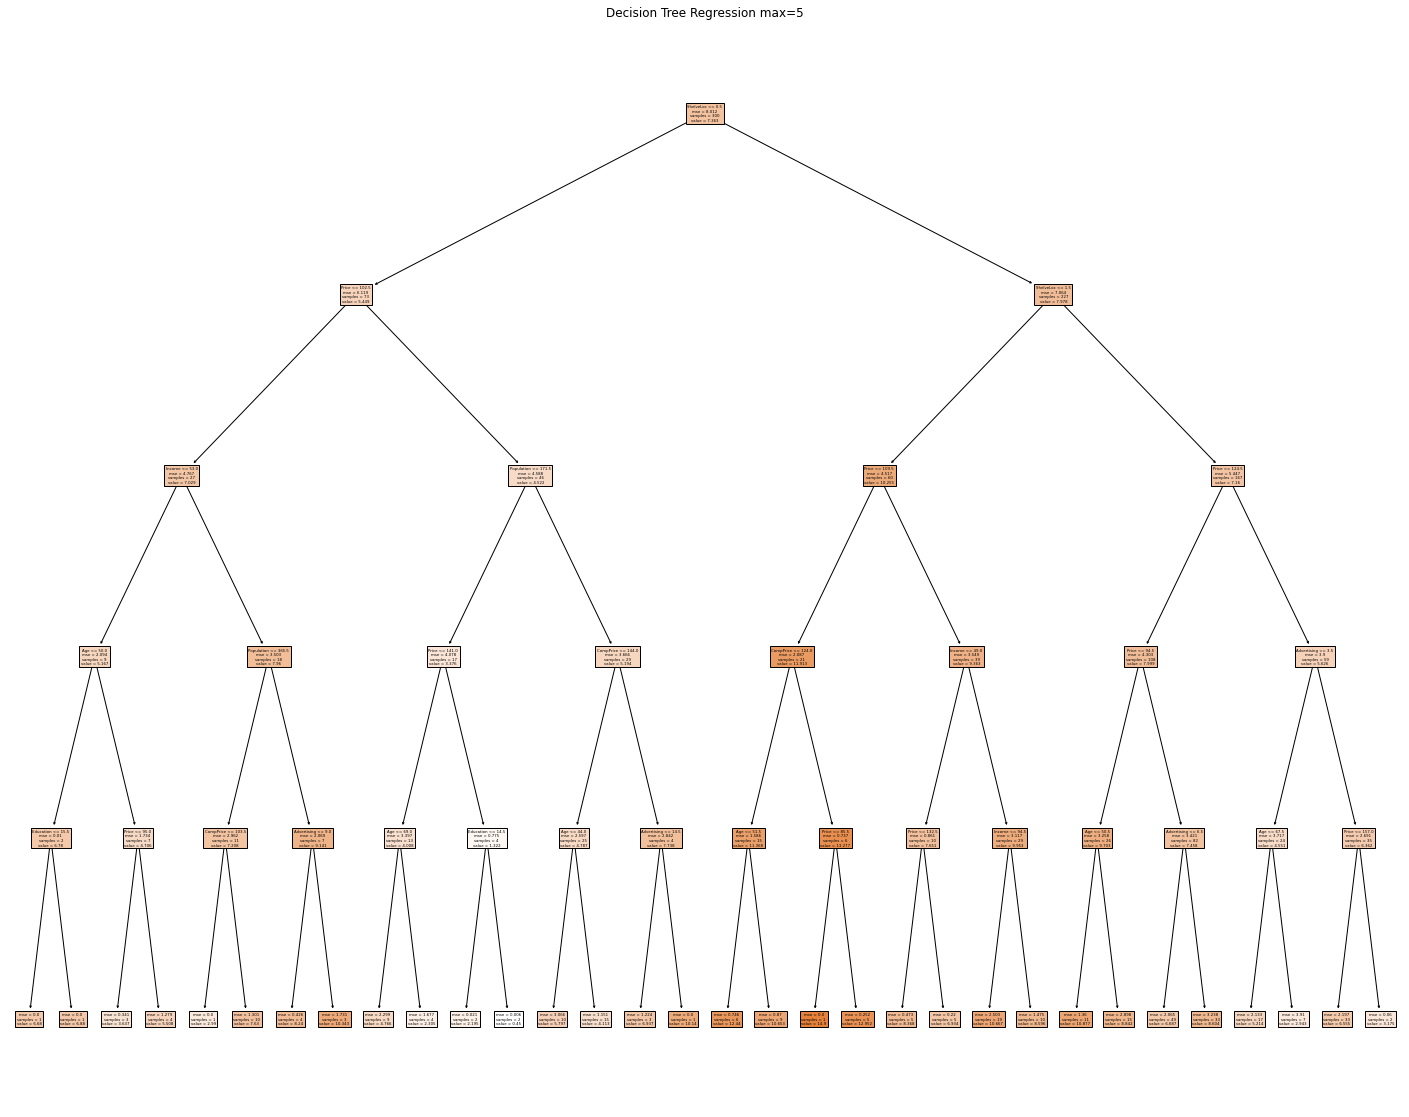

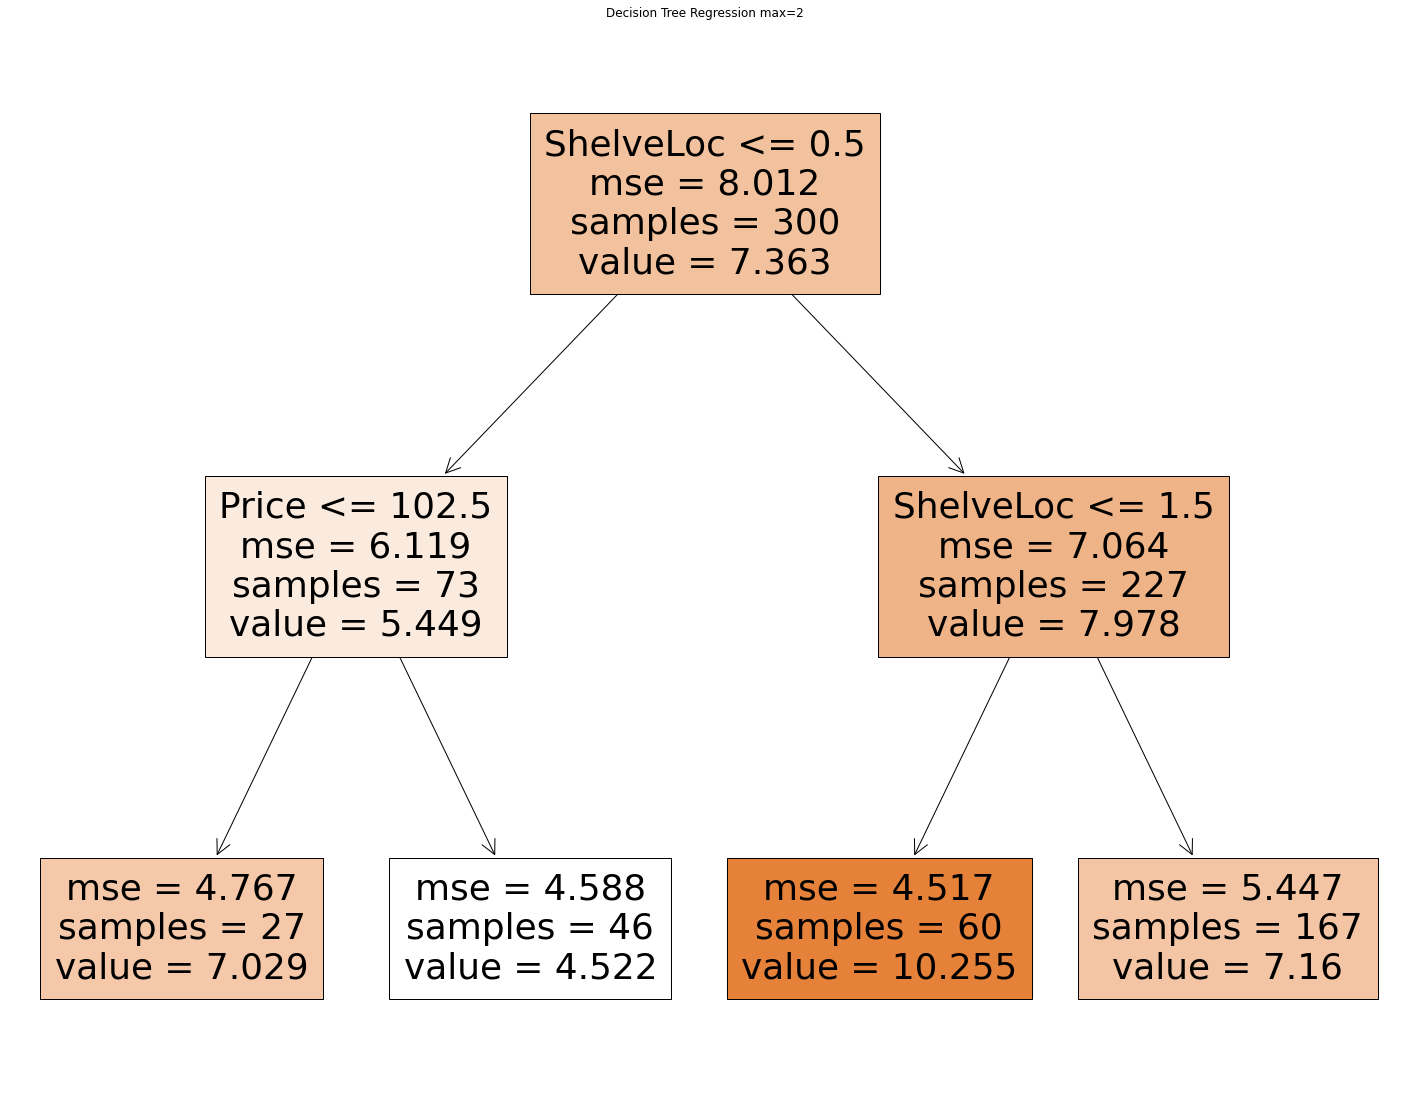

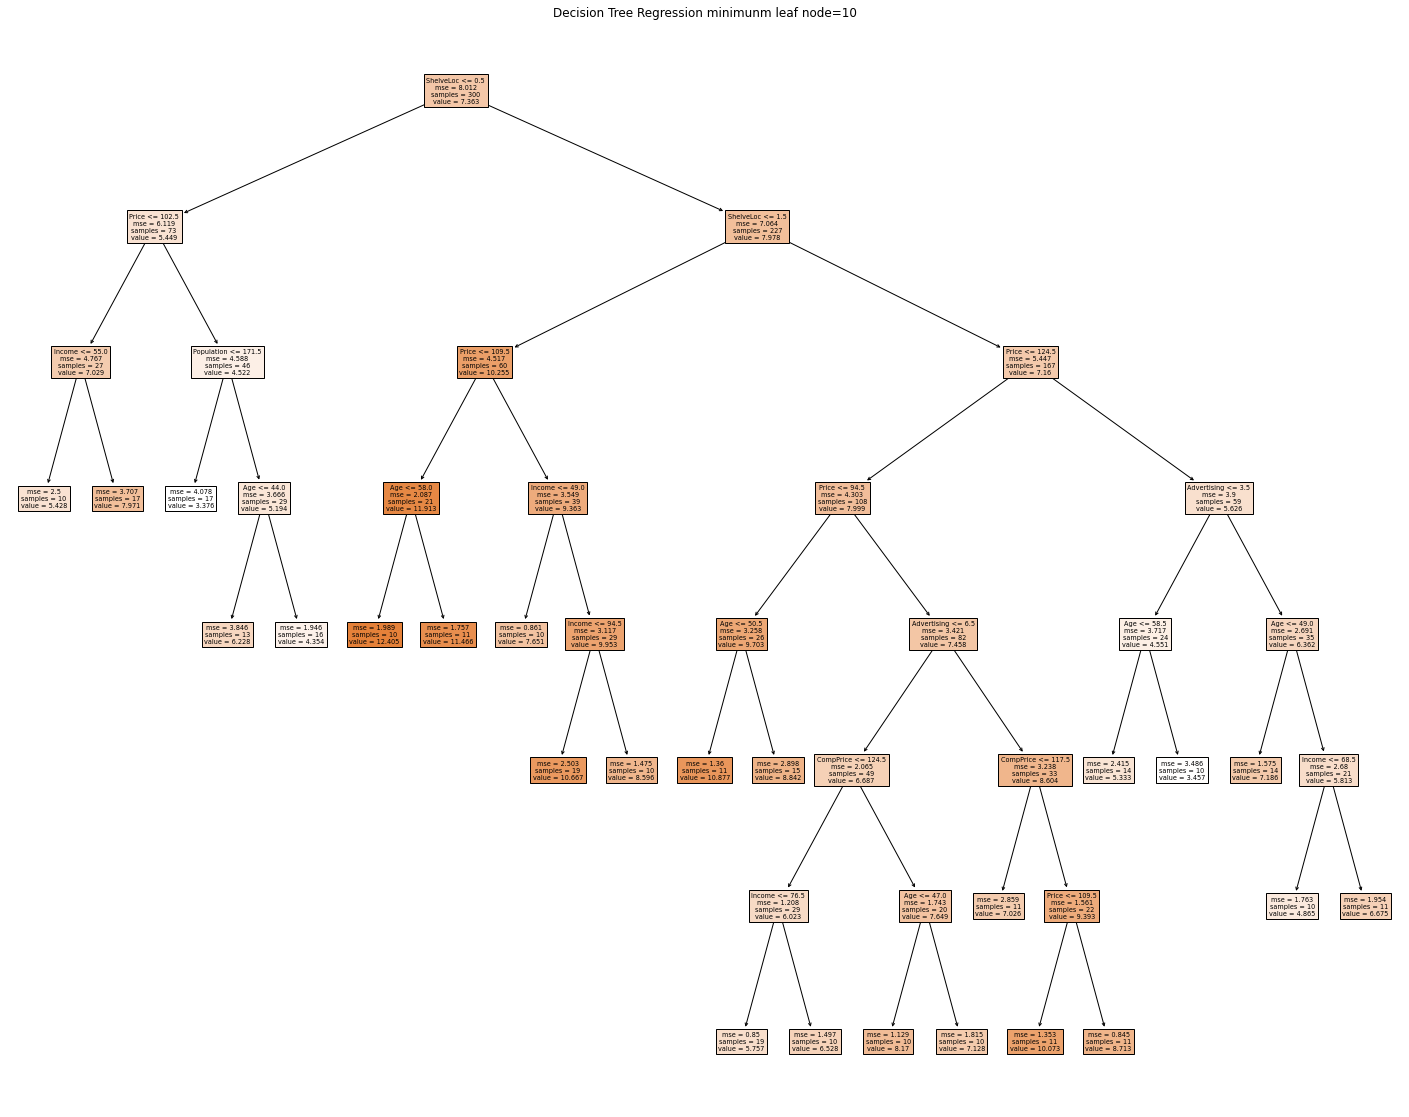

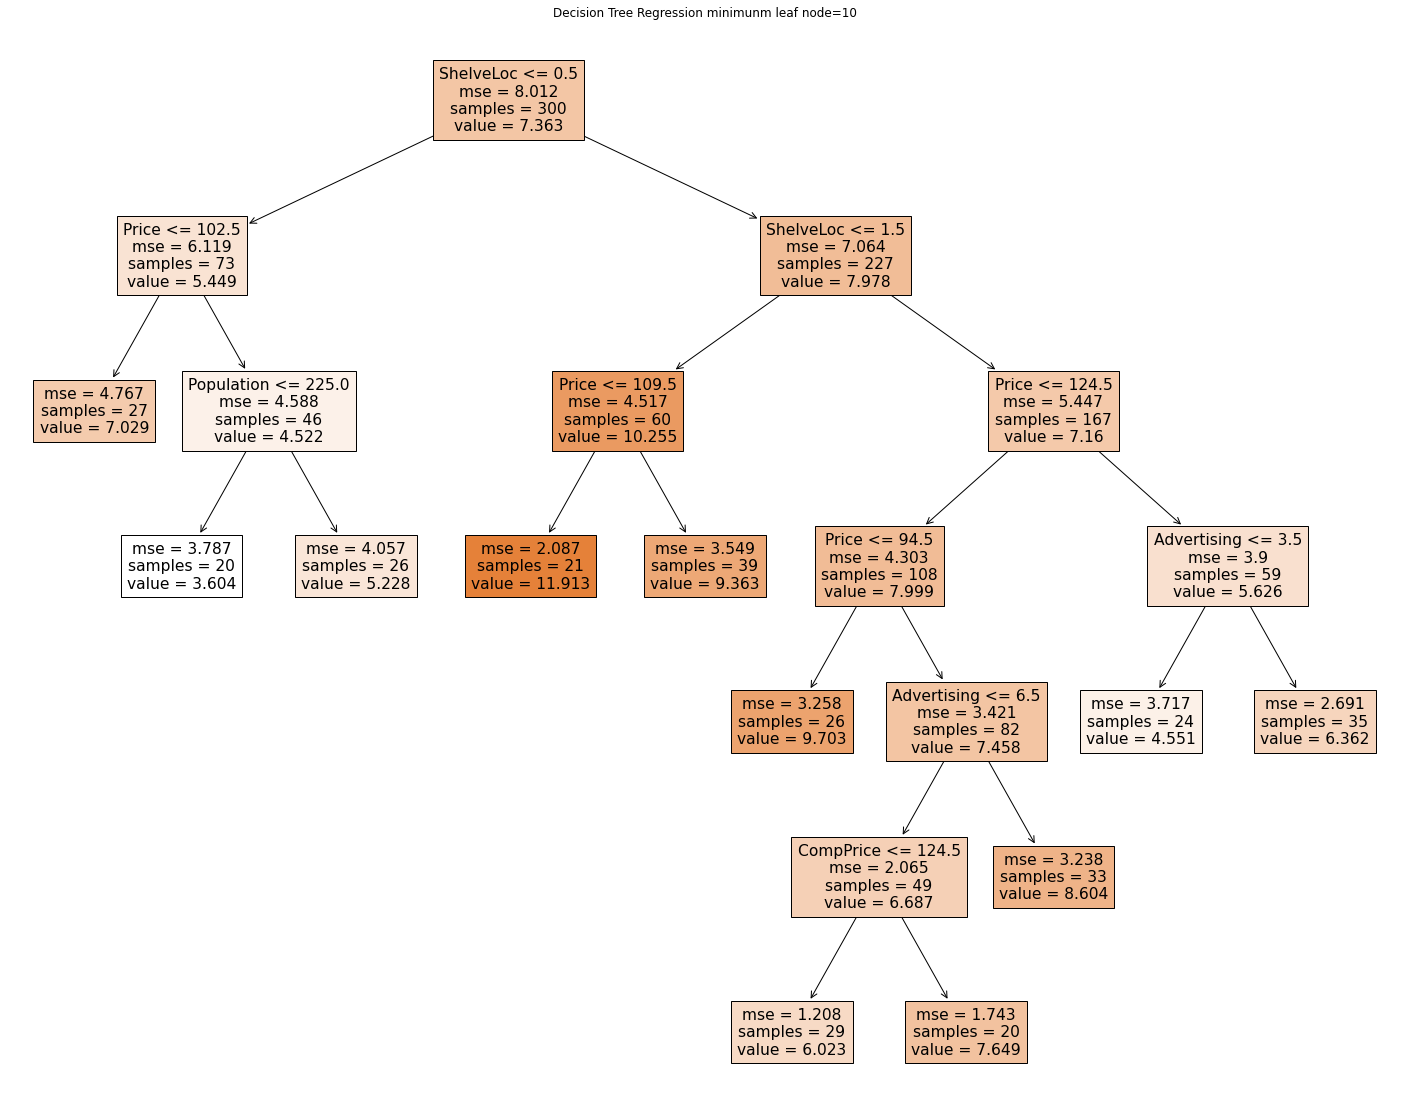

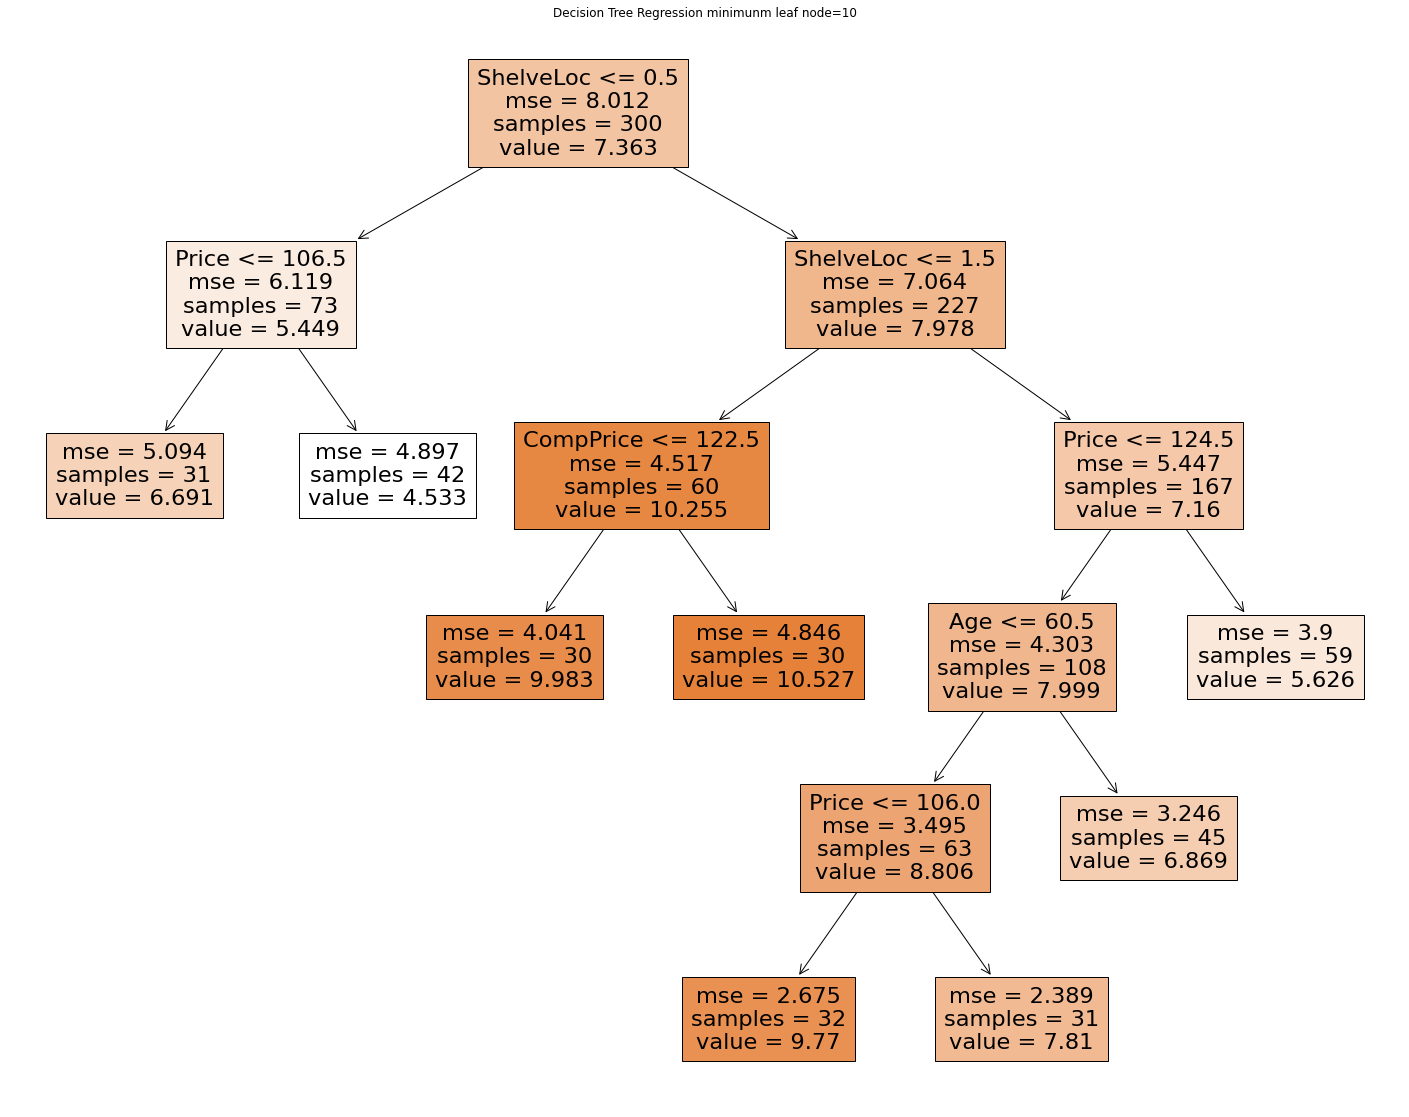

In [13]:
# Decision Tree
# 1.parameter list
# 1.1 max depth
treelist = []
dt0 = DecisionTreeRegressor()
dt1 = DecisionTreeRegressor(max_depth=10)
x_train = d_x[:300]
y_train = d_y[:300]

x_test = d_x[300:]
y_test = d_y[300:]
feature = np.array(x_train.columns)
target = y_train.name
print(feature)
print(target)

dt2 = DecisionTreeRegressor(max_depth=5)
dt3 = DecisionTreeRegressor(max_depth=2)

dt0.fit(x_train,y_train)
dt1.fit(x_train,y_train)
dt2.fit(x_train,y_train)
dt3.fit(x_train,y_train)
# 1.2. least node size
dt4 = DecisionTreeRegressor(min_samples_leaf=10)
dt5 = DecisionTreeRegressor(min_samples_leaf=20)
dt6 = DecisionTreeRegressor(min_samples_leaf=30)
dt4.fit(x_train,y_train)
dt5.fit(x_train,y_train)
dt6.fit(x_train,y_train)

# 2.visualize deicision tree
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt0, 
                   feature_names=feature,  
                   class_names=target,
                   filled=True)
plt.title("Decision Tree Regression default")

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt1, 
                   feature_names=feature,  
                   class_names=target,
                   filled=True)
plt.title("Decision Tree Regression max=10")

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt2, 
                   feature_names=feature,  
                   class_names=target,
                   filled=True)
plt.title("Decision Tree Regression max=5")


fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt3, 
                   feature_names=feature,  
                   class_names=target,
                   filled=True)
plt.title("Decision Tree Regression max=2")


fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt4, 
                   feature_names=feature,  
                   class_names=target,
                   filled=True)
plt.title("Decision Tree Regression minimunm leaf node=10")

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt5, 
                   feature_names=feature,  
                   class_names=target,
                   filled=True)
plt.title("Decision Tree Regression minimunm leaf node=10")

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt6, 
                   feature_names=feature,  
                   class_names=target,
                   filled=True)
plt.title("Decision Tree Regression minimunm leaf node=10")

treelist.append(dt0)
treelist.append(dt1)
treelist.append(dt2)
treelist.append(dt3)
treelist.append(dt4)
treelist.append(dt5)
treelist.append(dt6)

In [29]:
# 3. Prediction

print("default")
print(sum((dt0.predict(x_test)-y_test)**2))
print(dt0.score(x_test,y_test))

print("max_depth=10 ")
print((sum(dt1.predict(x_test)-y_test))**2)
print(dt1.score(x_test,y_test))
print("max_depth=5 ")
print(dt2.score(x_test,y_test))
print("max_depth=2 ")
print(dt3.score(x_test,y_test))

print("minimum leaf node=10")
print(sum((dt4.predict(x_test)-y_test)**2))
print(dt4.score(x_test,y_test))

print("minimum leaf node=20")
print(dt5.score(x_test,y_test))

print("minimum leaf node=30")
print(dt6.score(x_test,y_test))


default
564.0569000000002
0.2552869661284176
max_depth=10 
51.2655999999999
0.26276606176578166
max_depth=5 
0.34251799294966223
max_depth=2 
0.30570488224032766
minimum leaf node=10
440.63747350101875
0.4182351643452057
minimum leaf node=20
0.3962816362344179
minimum leaf node=30
0.2976227425381086


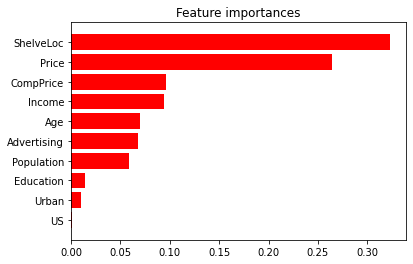

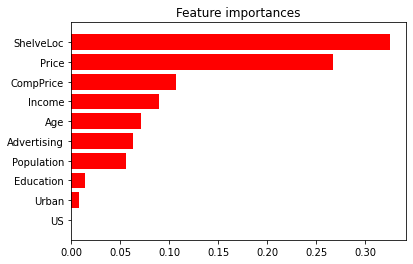

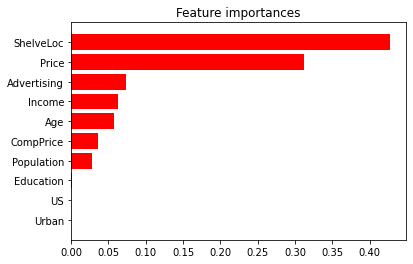

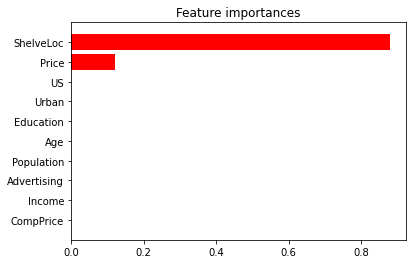

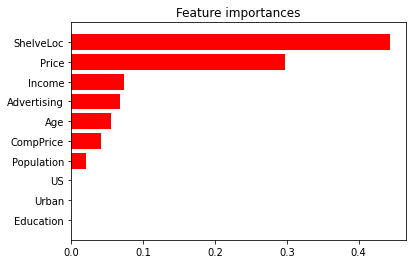

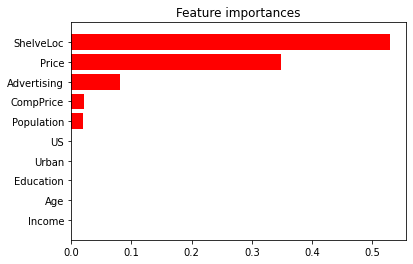

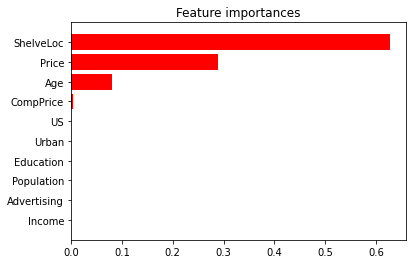

In [15]:
# 4. Feature importance

for tree in treelist:
    
    importances = tree.feature_importances_
    std = np.std([tree.feature_importances_],
             axis=0)
    indices = np.argsort(importances)

# Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.barh(range(len(feature)), importances[indices],
       color="r", xerr=std[indices], align="center")
    plt.yticks(range(x_train.shape[1]), feature[indices])
    plt.ylim([-1, len(feature)])
    plt.show()

In [30]:

# Bagging
# 1. parameter list
n_learner_list = [5,10,20]
max_depth_list = [2,5,10,20]
train_err_list = []
test_err_list = []
for depth in max_depth_list:
    base_learner = DecisionTreeRegressor(max_depth=depth)
    for n in n_learner_list:
        bg = BaggingRegressor(base_estimator=base_learner,n_estimators=n,oob_score=True,max_features=10)
        bg.fit(x_train,y_train)
        print("{} learner with {} max depth".format(n, depth))
        train_err = sum((bg.predict(x_train)-y_train)**2)
        test_err = sum((bg.predict(x_test)-y_test)**2)
        print(bg.oob_score_)
    


C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_bagging.py:1069: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_bagging.py:1069: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


5 learner with 2 max depth
455.55240326680337
0.39854328114005577
-0.5811223848651925
10 learner with 2 max depth
449.53014214595515
0.4064943519452775
0.22790834292037854
20 learner with 2 max depth
440.90620586388235
0.4178803623859575
0.350802128859928
5 learner with 5 max depth
366.83937083213544
0.5156693220206294
-0.15361219501967005
10 learner with 5 max depth
293.4115520608479
0.6126146012783396

C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_bagging.py:1069: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_bagging.py:1069: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



0.42410018847580433
20 learner with 5 max depth
275.42223824813675
0.6363655321981316
0.5917214969311935


C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_bagging.py:1069: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_bagging.py:1069: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


5 learner with 10 max depth
325.65328605902437
0.5700464852902847
-0.223024018126317
10 learner with 10 max depth
259.51154554589107
0.6573721012752722
0.5257061283817415
20 learner with 10 max depth
245.74992420142075
0.6755412944584998
0.6239064839238118
5 learner with 20 max depth
332.122884
0.5615048046361643
-0.45110952081523137


C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_bagging.py:1069: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_bagging.py:1069: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


10 learner with 20 max depth
278.8111809999999
0.6318911789221462
0.46435262552597967
20 learner with 20 max depth
253.14384249999998
0.6657792521391281
0.6322003593934795


In [32]:
# Random forest
n_learner_list = [5,10,20]
max_depth_list = [2,5,10,20]
max_features_list = ['auto', 'sqrt', 'log2']
m = {'auto':len(feature), 'sqrt':math.sqrt(len(feature)), 'log2':math.log2(len((feature)))}
for n in n_learner_list:
    for depth in max_depth_list:
        for mtry in max_features_list:
            rf = RandomForestRegressor(n_estimators=n,max_depth=depth,oob_score=True,max_features=mtry)
            rf.fit(x_train,y_train)
            
            print("{} learner with {} max depth {} max feature".format(n, depth, m[mtry]))
            print(sum((rf.predict(x_test)-y_test)**2))

            print(rf.score(x_test,y_test))
            print(rf.oob_score_)



C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates

5 learner with 2 max depth 10 max feature
481.28673588590607
0.3645667569286998
-0.10987343070489786
5 learner with 2 max depth 3.1622776601683795 max feature
581.1966005206389
0.23265776263072901
-0.28035222878872634
5 learner with 2 max depth 3.321928094887362 max feature
611.3556781507219
0.19283933615519522
-0.34046850401756124
5 learner with 5 max depth 10 max feature
358.17828124888615
0.5271043852211241
-0.0317494255630939
5 learner with 5 max depth 3.1622776601683795 max feature
448.3164256356103
0.40809679755790773
-0.5518765682456812
5 learner with 5 max depth 3.321928094887362 max feature
372.06521862592086
0.5087697397886577
-0.37770654292621897
5 learner with 10 max depth 10 max feature
328.4152833045684
0.5663998756162005
-0.275741557783701


C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


5 learner with 10 max depth 3.1622776601683795 max feature
388.3874106299824
0.48721987642065534
-0.7957648986689212
5 learner with 10 max depth 3.321928094887362 max feature
422.0322890713475
0.4427992169121734
-0.5313831001265115
5 learner with 20 max depth 10 max feature
378.7471159999999
0.49994776444278566
-0.3144115150269218


C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


5 learner with 20 max depth 3.1622776601683795 max feature
398.276976
0.4741628812303166
-0.5782638885004443
5 learner with 20 max depth 3.321928094887362 max feature
381.92353199999997
0.4957540059829596
-0.29569110116087693


C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


10 learner with 2 max depth 10 max feature
440.0630119865033
0.41899361438334426
0.27087251084874153
10 learner with 2 max depth 3.1622776601683795 max feature
541.9914071263152
0.2844195946661301
0.18971884991036303
10 learner with 2 max depth 3.321928094887362 max feature
517.8021449674754
0.31635619327776765
0.11127038377361609
10 learner with 5 max depth 10 max feature
302.2293890233843
0.6009725876507155

C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



0.5205094185809731
10 learner with 5 max depth 3.1622776601683795 max feature
354.4011122063014
0.5320913058972991
0.3219145938818375
10 learner with 5 max depth 3.321928094887362 max feature
312.4926297501356
0.5874222363670533
0.39176121263093644


C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


10 learner with 10 max depth 10 max feature
291.8456449771511
0.6146820370548736
0.5256333280436873
10 learner with 10 max depth 3.1622776601683795 max feature
342.879674321691
0.5473028297020983
0.3325668709701829
10 learner with 10 max depth 3.321928094887362 max feature
346.52660762620656
0.5424878566638585
0.3971571477864303


C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


10 learner with 20 max depth 10 max feature
234.111263
0.6909075858619265
0.5209780230857908
10 learner with 20 max depth 3.1622776601683795 max feature
410.76744899999994
0.45767195976065456
0.40151344020877333
10 learner with 20 max depth 3.321928094887362 max feature
334.046575
0.5589649939169947
0.31716201950681744
20 learner with 2 max depth 10 max feature
451.10784901627216
0.4044113371466749
0.3167785831433425
20 learner with 2 max depth 3.1622776601683795 max feature
515.0338570658116
0.32001110837920155
0.29339271819672075
20 learner with 2 max depth 3.321928094887362 max feature
563.6155281732218
0.2558697005160042
0.21194680091398665
20 learner with 5 max depth 10 max feature
292.79136147146045
0.6134334264986346
0.6249859118023559
20 learner with 5 max depth 3.1622776601683795 max feature
357.84864216239157
0.5275396011083617
0.4714712350381458
20 learner with 5 max depth 3.321928094887362 max feature
388.68224633493355
0.4868306107413808
0.4837446138791722
20 learner with 

C:\Users\adaqu\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [33]:
# AdaBoost
n_learner_list = [5,10,20,30,40,50]
max_depth_list = [2,5,10,20]
learning_rate_list = [0.1,0.5,1]

# learning rate
for n in n_learner_list:
    for depth in max_depth_list:
        base_learner = DecisionTreeRegressor(max_depth=depth)
        for learning_rate in learning_rate_list:
            
            ada = AdaBoostRegressor(base_estimator=base_learner,learning_rate=learning_rate,n_estimators=n,loss='square')
            ada.fit(x_train[90:],y_train[90:])
            
            # out of bag estimation
            print("oob")
            print(ada.score(x_train[:90],y_train[:90]))
            # learning rate is alpha
            print("{} learner with {} max depth {} learning rate".format(n, depth, learning_rate))
            print(sum((ada.predict(x_test)-y_test)**2))
            print(ada.score(x_test,y_test))


oob
0.3018468545942219
5 learner with 2 max depth 0.1 learning rate
529.156067084508
0.3013658371875988
oob
0.29147434963319885
5 learner with 2 max depth 0.5 learning rate
555.0831922649099
0.26713477281684883
oob
0.3131785830059306
5 learner with 2 max depth 1 learning rate
494.95553915622963
0.3465201095907514
oob
0.4833539410260237
5 learner with 5 max depth 0.1 learning rate
402.19725283506966
0.4689870182004321
oob
0.5490708635954115
5 learner with 5 max depth 0.5 learning rate
375.2314757017021
0.5045893939531177
oob
0.5109774959616084
5 learner with 5 max depth 1 learning rate
373.9848187901249
0.5062353301181
oob
0.4406832309311295
5 learner with 10 max depth 0.1 learning rate
472.0412531910431
0.3767733826561728
oob
0.596956283002434
5 learner with 10 max depth 0.5 learning rate
392.3287056258607
0.4820162635337929
oob
0.44791666228229454
5 learner with 10 max depth 1 learning rate
403.6046207357001
0.46712889853368933
oob
0.5541989157328688
5 learner with 20 max depth 0.1 le

In [19]:
# nextwork: 
# 1. for each model, find the best parameter using out of bag data
# 2. for each model, plot train/error comparison
# 3. plot the feature importance in different model --- see the relationship between correlation and this
# 4. compare performace of all models using score(mean of square error)


# question: least square loss for adaboost and learning rate?

In [9]:
a = [1]

In [13]:
a = [range(1,2)]*3
print(a)

[range(1, 2), range(1, 2), range(1, 2)]


In [ ]:
plt.figure()
model = ["Tree", "Bagging", "Random Forest", "Adaboost"]
final_train_err = []
final_test_err = []
plt.plot(model, final_train_err, 'bo',c="blue")
plt.plot(model, final_test_err, 'bo', c='orange')